# Taller 3 - Red de Monitoreo de Calidad del Aire de Bogota.


http://rmcab.ambientebogota.gov.co/Report/stationreport


La calidad de aire es un problema crítico en las grandes ciudades del mundo. Varias afecciones respiratorias están relacionadas con la calidad del aire que respiramos y por tanto, es importante para las autoridades locales medir, reportar y predecir de manera constante y precisa los niveles de los diferentes contaminantes presentes en el aire de la ciudad. Por esta razón, la secretaría distrital de ambiente de Bogotá instaló 19 estaciones de monitoreo de aire en la ciudad y proporciona de manera libre estos datos para que cualquiera pueda hacer uso de esta información.
Uno de los contaminantes más peligrosos para la salud humana es el material particulado de tamaño 9 menor a 2.5 micras (PM2.5) ya que se acumula en los pulmones y puede causar daños permanentes a quienes están expuestos a él  por largos periodos de tiempo. 
Al analizar los datos provenientes de las estaciones de monitoreo, se han identificado varios problemas asociados a la calidad de los datos y a la fiabilidad de la información. Por ejemplo se ha identificado que más del 20% de los datos correspondientes a las mediciones de dicho contaminante están perdidas. Esto es un fenomeno común, ya que es común que los sensores de las diferentes estanciones fallén por diversos motivos, como cortes de energía, periodos de mantenimiento preventivo y reparaciones efectuadas a las estaciones. 
Adicionalmente, el área que cubren los sensores es muy pequeña comparada con el área de una ciudad como Bogotá. Entonces se necesitan modelos que permitan informar a la ciudadanía sobre los niveles de contaniminazión aún en áreas que no cuentan con sensores. Incluso, si los datos son de muy buena calidad, podemos crear modelos que predigan la calidad del aire en periodos de tiempo futuros.

En esta sección se realiza una bodega de datos  que contine 68.000 registros de la calidad del aire de la ciudad de Bogotá.  La bodega de datos, se conecta con el lenguaje de programción Python para hacer procesamiento de datos y luego mostrar la infromacion usando librerias de datos. 


## Descripción de los datos 

## 1. Cargar Librerias
***

In [178]:
# Carga las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
from matplotlib.pyplot import figure
%matplotlib inline

## 2. Cargar Datos

In [179]:
#dataframe nombrado "df"

#cargar conjunto de datos ../Taller1/data/dataset_with_geo_missing.csv
df = pd.read_csv('work/dataScienceCourse/data/dataset_with_geo_missing.csv', sep=',', engine='python', encoding='latin1')
df.head()


,PM10,PM2.5,NO,NO2,NOX,CO,OZONO,Station,DateTime,Status,Latitud,Longitud,month,day_week,day_month,hour
0,52.6,37.0,53.384,3.428,56.817,NaN,NaN,7MA,2021-01-01 01:00:00,True,4.645117,-74.061503,1,4,1,1
1,77.9,61.0,49.105,3.420,52.525,NaN,NaN,7MA,2021-01-01 02:00:00,True,4.645117,-74.061503,1,4,1,2
2,58.5,48.0,47.284,4.062,51.346,NaN,NaN,7MA,2021-01-01 03:00:00,True,4.645117,-74.061503,1,4,1,3
3,57.2,44.0,46.059,3.606,49.664,NaN,NaN,7MA,2021-01-01 04:00:00,True,4.645117,-74.061503,1,4,1,4
4,53.5,39.0,39.851,1.625,41.475,NaN,NaN,7MA,2021-01-01 05:00:00,True,4.645117,-74.061503,1,4,1,5


## 3: Explorar datos
*** 

###  3.1 Estadisticas 
***
Resumen: 
- Identificar nombre de las columnas
- Número de columnas y filas 
- Tamaño del conjunto de datos
- Tipos de datos
- Porcentajes de valores
- Correlaciones de variables
- Valores nulos


In [180]:
#nombre de las columnas 
df.columns

Index(['PM10', 'PM2.5', 'NO', 'NO2', 'NOX', 'CO', 'OZONO', 'Station',
       'DateTime', 'Status', 'Latitud', 'Longitud', 'month', 'day_week',
       'day_month', 'hour'],
      dtype='object')

In [181]:
# Estadisticas basicas del conjunto de datos 
df.describe()

,PM10,PM2.5,NO,NO2,NOX,CO,OZONO,Latitud,Longitud,month,day_week,day_month,hour
count,146426.000000,151128.000000,138776.000000,138778.000000,138772.000000,135202.000000,134308.000000,166440.000000,166440.000000,166440.000000,166440.000000,166440.000000,166440.000000
mean,31.978378,15.323489,18.616861,14.979247,33.590300,0.691233,11.782188,4.653331,-74.104733,6.526027,3.002740,15.720548,12.500000
std,22.835375,12.467040,26.932382,9.233824,30.056319,0.574689,10.133101,0.068116,0.039154,3.447862,1.997948,8.796273,6.922207
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.532097,-74.166272,1.000000,0.000000,1.000000,1.000000
25%,15.800000,6.000000,3.169000,7.515000,13.109000,0.324885,3.458000,4.595958,-74.143714,4.000000,1.000000,8.000000,6.750000
50%,26.700000,12.000000,7.759000,13.742000,24.259000,0.520580,9.564000,4.645117,-74.114869,7.000000,3.000000,16.000000,12.500000
75%,42.300000,21.600000,21.532000,20.626000,43.472250,0.862195,17.518250,4.710381,-74.069472,10.000000,5.000000,23.000000,18.250000
max,326.200000,188.000000,341.104000,92.256000,361.341000,12.025010,88.182000,4.783614,-74.030414,12.000000,6.000000,31.000000,24.000000


In [182]:
#Descripción del conjunto de datos: 166440 observaciones y 10 caracteristicas
df.shape

(166440, 16)

In [183]:
# Comprobar el número de Filas y Columnas 
print("Número de  Filas: ", len(df))
print("Número de Columnas ", + len(df.columns))

#Comprobar el tipo de datos en las características
print(df.dtypes)

Número de  Filas:  166440
Número de Columnas  16
PM10         float64
PM2.5        float64
NO           float64
NO2          float64
NOX          float64
CO           float64
OZONO        float64
Station       object
DateTime      object
Status          bool
Latitud      float64
Longitud     float64
month          int64
day_week       int64
day_month      int64
hour           int64
dtype: object


In [184]:
#Comprobar si hay valores nulos true o false
print(df.isnull().any())

#df.isnull().any(1)

PM10          True
PM2.5         True
NO            True
NO2           True
NOX           True
CO            True
OZONO         True
Station      False
DateTime     False
Status       False
Latitud      False
Longitud     False
month        False
day_week     False
day_month    False
hour         False
dtype: bool


In [185]:
# Esta celda eliminará todas las filas que tienen valores nulos
target = 'PM2.5'
df.dropna(subset=[target], inplace=True)
df.isnull().sum()

PM10          9272
PM2.5            0
NO           20284
NO2          20281
NOX          20287
CO           24826
OZONO        25578
Station          0
DateTime         0
Status           0
Latitud          0
Longitud         0
month            0
day_week         0
day_month        0
hour             0
dtype: int64

In [186]:
# Resumen de una variable (False V.S. True) en la variable Status

# Agrupar por la columna 'Status'
Status_Summary = df.groupby('Status')

# Calcular la media de las columnas numéricas
Status_Summary.mean(numeric_only=True)

,PM10,PM2.5,NO,NO2,NOX,CO,OZONO,Latitud,Longitud,month,day_week,day_month,hour
Status,,,,,,,,,,,,,
False,18.914355,6.078521,12.106935,11.669613,23.776336,0.463858,12.364907,4.656016,-74.097669,6.452010,3.033410,15.552873,12.555353
True,45.786601,24.622938,26.674421,19.175339,45.843120,0.925081,11.054208,4.647198,-74.113800,6.885615,2.986475,15.995248,12.431924


In [187]:
#Filtrar datos por columnas
df['Status'] = df['PM2.5']>12
df.Status.value_counts()

Status
False    75786
True     75342
Name: count, dtype: int64

####  3.1.1 Correlación
***

Resumen:


- Hay una correlación **positiva(+) a 1** o **negativa(-) a -1** hay una correlacion fuerte. La aproximación a 0 es mas debil la relacion lineal  

,PM10,PM2.5,NO,NO2,NOX,CO,OZONO,Latitud,Longitud,month,day_week,day_month,hour
PM10,1.000000,0.802069,0.333551,0.429229,0.431702,0.540223,-0.037284,-0.156404,-0.347981,0.067521,-0.051476,0.024679,0.001573
PM2.5,0.802069,1.000000,0.336237,0.476576,0.447956,0.574157,-0.060233,-0.112961,-0.250248,0.057089,-0.027135,0.024499,-0.017080
NO,0.333551,0.336237,1.000000,0.177441,0.954018,0.641977,-0.392281,0.000683,0.112076,0.065695,-0.041166,0.014469,-0.089875
NO2,0.429229,0.476576,0.177441,1.000000,0.463926,0.556881,-0.357302,-0.051752,-0.282244,0.125257,-0.061379,0.039778,0.078510
NOX,0.431702,0.447956,0.954018,0.463926,1.000000,0.724278,-0.438799,-0.015372,0.014813,0.097226,-0.055696,0.025396,-0.056927
CO,0.540223,0.574157,0.641977,0.556881,0.724278,1.000000,-0.296780,-0.242054,-0.229861,0.031094,-0.033735,0.011437,0.067562
OZONO,-0.037284,-0.060233,-0.392281,-0.357302,-0.438799,-0.296780,1.000000,-0.005822,0.052697,-0.048731,0.037873,-0.002753,0.138389
Latitud,-0.156404,-0.112961,0.000683,-0.051752,-0.015372,-0.242054,-0.005822,1.000000,0.454655,0.026990,0.001172,0.005779,0.000495
Longitud,-0.347981,-0.250248,0.112076,-0.282244,0.014813,-0.229861,0.052697,0.454655,1.000000,0.011046,-0.001147,0.000459,0.000508
month,0.067521,0.057089,0.065695,0.125257,0.097226,0.031094,-0.048731,0.026990,0.011046,1.000000,-0.007524,0.010497,0.000005


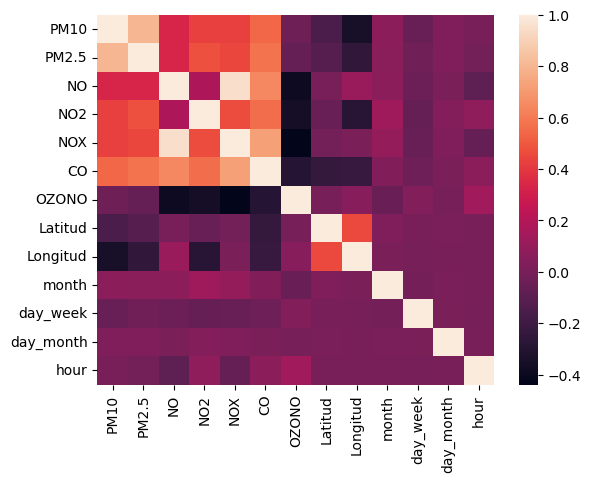

In [188]:
#Matriz de correlación
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
corr

###  3.2 Gráficos de distribución 


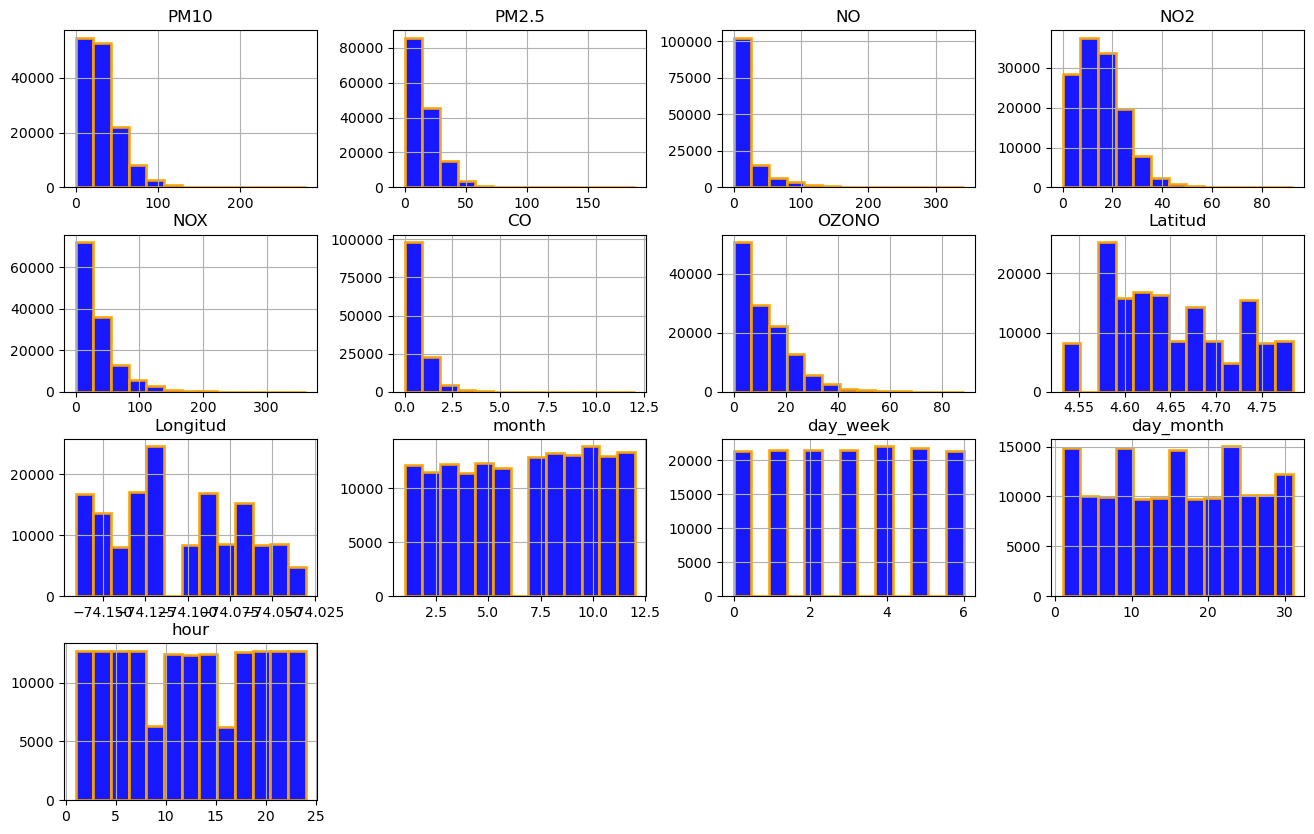

In [189]:
#hist es un grafico (pandas) de distribucion de  datos.
#este grafico nos sirve para identificar cuales son las variables numericas y su frencuencia. 

df.hist(figsize=(16,10),facecolor='blue', alpha=0.9, bins=13, edgecolor='orange', linewidth=2)
plt.show()

/tmp/ipykernel_9014/1448057234.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.PM10, kde=False, color="g", ax=axes[0]).set_title('PM10')
/tmp/ipykernel_9014/1448057234.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Status, kde=False, color="r", ax=axes[1]).set_title('Status')
/tmp

Text(0.5, 1.0, 'NOX')

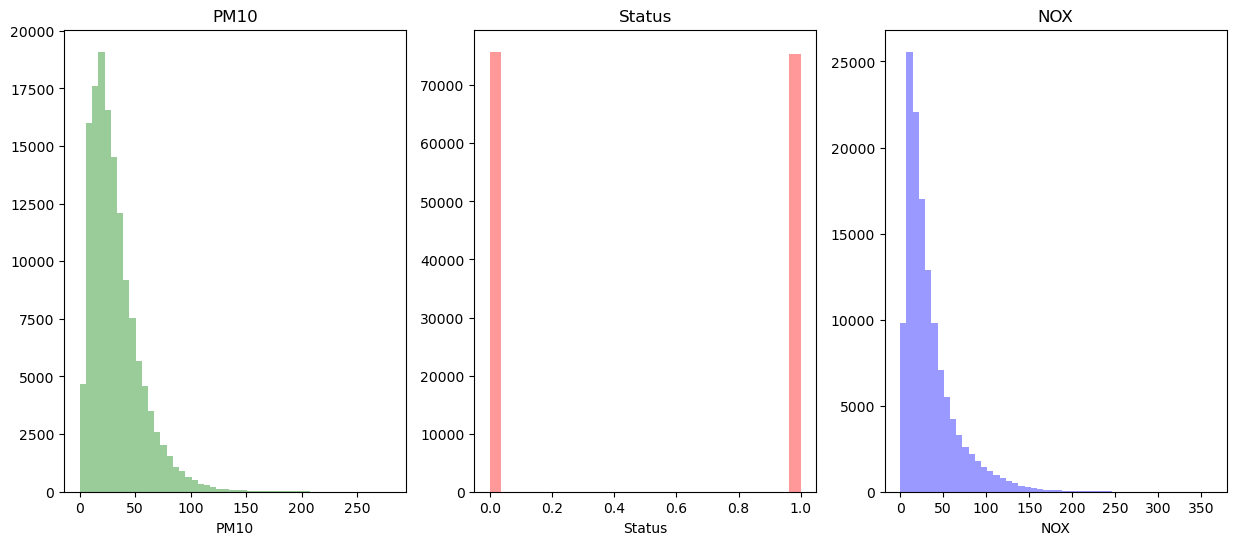

In [190]:
#otra forma de ver la distribucion de los datos
# Uso de Libreria Seaborn (sna) para poner multiples graficos de distribución  
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

#variable PM10
sns.distplot(df.PM10, kde=False, color="g", ax=axes[0]).set_title('PM10')

#variable PM10
sns.distplot(df.Status, kde=False, color="r", ax=axes[1]).set_title('Status')

#variable NOX
sns.distplot(df.NOX, kde=False, color="b", ax=axes[2]).set_title('NOX')

###  3.3 Gráfico de barras


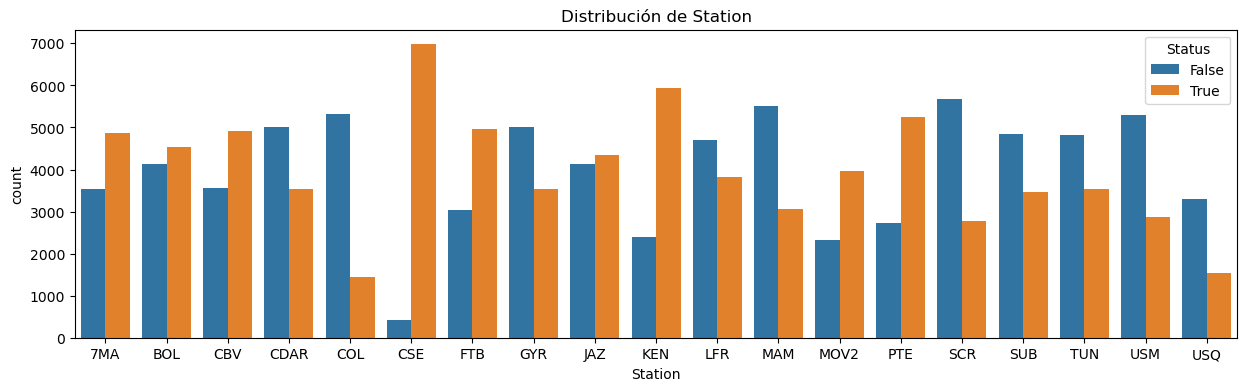

In [191]:
#ditribucion por estacion 
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(x="Station", hue='Status', data=df).set_title('Distribución de Station');

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000.]),
 [Text(0.0, 0, '0'),
  Text(2000.0, 0, '2000'),
  Text(4000.0, 0, '4000'),
  Text(6000.0, 0, '6000'),
  Text(8000.0, 0, '8000'),
  Text(10000.0, 0, '10000')])

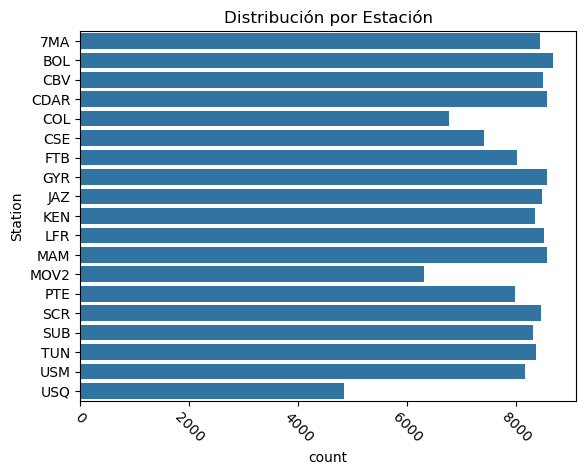

In [192]:
# Types of colors
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8' ,'#FFFFF']

# Count Plot (a.k.a. Bar Plot)
sns.countplot(y='Station', data=df).set_title('Distribución por Estación');
 
# Rotate x-labels
plt.xticks(rotation=-45)

###  3.4 Gráficos de Cajas


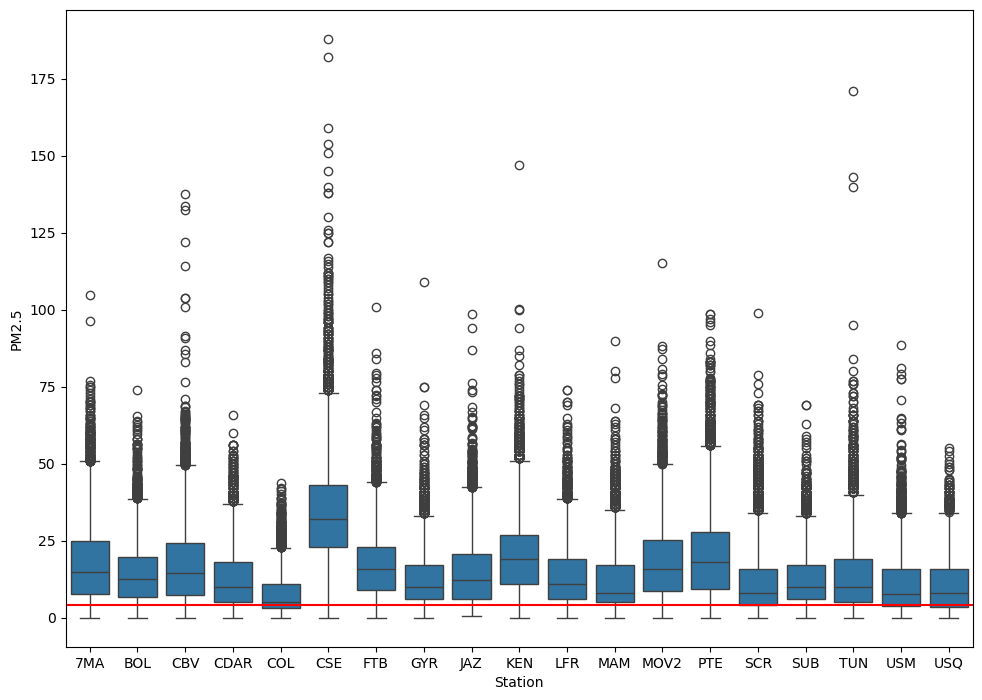

In [193]:
import seaborn as sns

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

sns.boxplot(x="Station", y="PM2.5",  data=df)
valh=4
plt.axhline(valh, color='red')

Hemos revisado la información de ded dataset "calidad del aire", donde es importante la estación que mide la calidad del aire, sin embargo, no tenemos donde esta ubicada. 

Ahora vamos a cargar un nuevo dataset, que contiene la infromación de la ubicación (Latitud, Longitud) de cada estación.

In [194]:
#Contar valores nulos por columnas
df.isnull().sum()

PM10          9272
PM2.5            0
NO           20284
NO2          20281
NOX          20287
CO           24826
OZONO        25578
Station          0
DateTime         0
Status           0
Latitud          0
Longitud         0
month            0
day_week         0
day_month        0
hour             0
dtype: int64

In [195]:
## Hay 74803 valores NaN de 166440
nan_rows = df[df.isnull().any(axis=1)]
nan_rows

,PM10,PM2.5,NO,NO2,NOX,CO,OZONO,Station,DateTime,Status,Latitud,Longitud,month,day_week,day_month,hour
0,52.6,37.0,53.384,3.428,56.817,NaN,NaN,7MA,2021-01-01 01:00:00,True,4.645117,-74.061503,1,4,1,1
1,77.9,61.0,49.105,3.420,52.525,NaN,NaN,7MA,2021-01-01 02:00:00,True,4.645117,-74.061503,1,4,1,2
2,58.5,48.0,47.284,4.062,51.346,NaN,NaN,7MA,2021-01-01 03:00:00,True,4.645117,-74.061503,1,4,1,3
3,57.2,44.0,46.059,3.606,49.664,NaN,NaN,7MA,2021-01-01 04:00:00,True,4.645117,-74.061503,1,4,1,4
4,53.5,39.0,39.851,1.625,41.475,NaN,NaN,7MA,2021-01-01 05:00:00,True,4.645117,-74.061503,1,4,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166067,NaN,6.0,NaN,NaN,NaN,0.25272,15.399,USQ,2021-12-16 12:00:00,False,4.710381,-74.030414,12,3,16,12
166277,NaN,8.0,6.349,7.900,14.249,0.34390,7.896,USQ,2021-12-25 06:00:00,False,4.710381,-74.030414,12,5,25,6
166322,NaN,16.0,1.176,5.196,6.372,0.23339,10.659,USQ,2021-12-27 03:00:00,True,4.710381,-74.030414,12,0,27,3
166367,NaN,17.0,6.271,8.220,14.491,0.36351,12.266,USQ,2021-12-28 00:00:00,True,4.710381,-74.030414,12,1,28,24


## 4. Completar datos con Modelos de Machine Learning

### Instalar Librerias

In [196]:
%pip install folium
%pip install sklearn
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRE

### Cargar Librerias

In [197]:
import os, re
import numpy as np

import pandas as pd

import folium 
from folium.plugins import FastMarkerCluster
 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# from utils import *

from sklearn.model_selection import train_test_split,StratifiedShuffleSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

### Cargar dataset

In [198]:
#dataframe nombrado "df"
df = pd.read_csv('work/dataScienceCourse/data/dataset_with_geo_missing.csv', sep=',', engine='python', encoding='latin1')
df.head(3)


,PM10,PM2.5,NO,NO2,NOX,CO,OZONO,Station,DateTime,Status,Latitud,Longitud,month,day_week,day_month,hour
0,52.6,37.0,53.384,3.428,56.817,NaN,NaN,7MA,2021-01-01 01:00:00,True,4.645117,-74.061503,1,4,1,1
1,77.9,61.0,49.105,3.420,52.525,NaN,NaN,7MA,2021-01-01 02:00:00,True,4.645117,-74.061503,1,4,1,2
2,58.5,48.0,47.284,4.062,51.346,NaN,NaN,7MA,2021-01-01 03:00:00,True,4.645117,-74.061503,1,4,1,3


In [199]:
#Para este ejemplo, vamos a llenar con la media todas las filas excepto la de PM2.5
df.isnull().sum()

PM10         20014
PM2.5        15312
NO           27664
NO2          27662
NOX          27668
CO           31238
OZONO        32132
Station          0
DateTime         0
Status           0
Latitud          0
Longitud         0
month            0
day_week         0
day_month        0
hour             0
dtype: int64

In [201]:
df['PM10'].fillna((df['PM10'].mean()), inplace=True)
#df['PM2.5'].fillna((df['PM2.5'].mean()), inplace=True) # Menos esta columna
df['CO'].fillna((df['CO'].mean()), inplace=True)
df['NO'].fillna((df['NO'].mean()), inplace=True)
df['NO2'].fillna((df['NO2'].mean()), inplace=True)
df['NOX'].fillna((df['NOX'].mean()), inplace=True)
df['OZONO'].fillna((df['OZONO'].mean()), inplace=True)

In [140]:
df.isnull().sum()

PM10             0
PM2.5        15312
NO               0
NO2              0
NOX              0
CO               0
OZONO            0
Station          0
DateTime         0
Status           0
Latitud          0
Longitud         0
month            0
day_week         0
day_month        0
hour             0
dtype: int64

In [202]:
# Metodos utils que no se pudieron importar
import numpy as np
import os
import re
import folium
import pandas as pd
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
from folium.plugins import FastMarkerCluster
from matplotlib.pyplot import figure
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from matplotlib.pyplot import figure
import math


# You will call this function multiple times in this notebook. Think of this function as a tool which will take the data,
# fit into the Linear Regression Model and Evaluate

def missing_values_imputation_mean(train_df, test_df, target):
    '''
    This function will take the features(x), the target(y) and the model name (Linear Regression)
    and will fit the data into the model (train your data using Linear Regression) 
    and Evaluate by returning the mean squared error and the mean absolute error 
    '''
    
    y_train = train_df[target]
    y_test = test_df[target]
    
    y_pred = np.array([np.mean(y_train)] * len(y_test))
    
    return {"mse": mean_squared_error(y_pred, y_test),"mae": mean_absolute_error(y_pred, y_test)}

def missing_values_imputation_mean_by_station(train_df, test_df, target):
    '''
    This function will take the features(x), the target(y) and the model name (Linear Regression)
    and will fit the data into the model (train your data using Linear Regression) 
    and Evaluate by returning the mean squared error and the mean absolute error 
    '''
    y_test = test_df[target]

    mean_by_station = train_df.groupby(['Station']).agg(({target: 'mean'}))
    map_station_mean = {}

    for index, row in mean_by_station.iterrows():
        map_station_mean[row.name] = row[0]

    def predictor(x):
        return map_station_mean[x['Station']]

    y_pred = test_df.apply(predictor, axis=1).values
    
    return {"mse": mean_squared_error(y_pred, y_test),"mae": mean_absolute_error(y_pred, y_test)}


def dms2dd(degrees, minutes, seconds, direction):
    dd = float(degrees) + float(minutes)/60 + float(seconds)/(60*60);
    if direction == 'S' or direction == 'W':
        dd *= -1
    return dd;


def dd2dms(deg):
    d = int(deg)
    md = abs(deg - d) * 60
    m = int(md)
    sd = (md - m) * 60
    return [d, m, sd]


def parse_dms(coor):
    parts = re.split('[^\d\w]+', coor)
    dec_coor = dms2dd(parts[0], parts[1], float(parts[2]+'.'+parts[2]), parts[4])

    return dec_coor


def replace24(datetimex):
    return datetimex.replace('24:00', '00:00')


def plot_features(df, feature_names):
    # declarando un objeto tipo Figura para desarrollar los subplots
    fig = plt.figure(figsize=(20, 10))

    x = 1

    for column in feature_names:
        ax = fig.add_subplot(3,5,x)
        df[[column]].plot(kind='hist', ax=ax, rwidth=1)
        x = x + 1
        

def color_producer(pm):
    if pm < 12.0:
        return 'green'
    elif pm < 35.0:
        return 'yellow'
    elif pm < 55.4:
        return 'orange'
    elif pm < 150:
        return 'red'
    else:
        return 'purple'
    
def leaflet_plot(data):
    '''
    Create a plot to visualize 2 set of geo points. The popup will show a scatter with the average hourly emisions
    '''
    data = data[['Latitud', 'Longitud', 'PM2.5', 'Station', 'hour']]
    data2 = data.groupby(['Station', 'hour']).agg(({'PM2.5': 'mean'}))

    grouped_data = {}
    for index, row in data2.iterrows():
        if index[0] in grouped_data:
            grouped_data[index[0]][index[1]] = row[0]
        else:
            grouped_data[index[0]] = [0] * 24
            grouped_data[index[0]][index[1]] = row[0]

    for key in grouped_data:
        plt.plot(list(range(0, 24)), grouped_data[key], '-o')
        plt.title(f'Station {key} avg. PM2.5 / hour')
        plt.xlabel('hour')
        plt.ylabel('Avg. PM2.5') 
        plt.savefig(f'img/tmp/{key}.png')
        plt.clf()

    #     data2 = temp_df.groupby('Station').agg(({'PM2.5': 'mean', 'Latitud': 'min', 'Longitud': 'min'}))
    data2 = data.groupby('Station').agg(({'PM2.5': 'mean', 'Latitud': 'min', 'Longitud': 'min'}))
    data2 = np.array([data2['Latitud'].values, data2['Longitud'].values, data2['PM2.5'].values, data2.index.values]).T
    #print((data[0].Latitud, data[0].Longitud))
    map3 = folium.Map(location=[data2[0][0], data2[0][1]], tiles='openstreetmap', zoom_start=11)
    
    fg = folium.FeatureGroup(name="My Map")
    for lt, ln, pol, station in data2:
        fg.add_child(folium.CircleMarker(location=[lt, ln], radius = 15, popup=f"<img src='img/tmp/{station}.png'>",
        fill_color=color_producer(pol), color = '', fill_opacity=0.5))
        map3.add_child(fg)
    return map3


def draw_example(sample, missing_index, interpolate=True, title=''):
    missing = missing_index
    missing_before_after = [missing[0]-1]+missing+ [missing[-1]+1]

    example1 = sample.copy()
    example1.loc[example1['hour'].isin(missing),'PM2.5'] = float('NaN')
    plt.plot(missing_before_after,  sample[sample['hour'].isin(missing_before_after)]['PM2.5'] , 'r--o')

    if interpolate:
        example1['newPM2.5'] = example1['PM2.5'].interpolate(method='linear')
        plt.plot(missing_before_after, example1[example1['hour'].isin(missing_before_after)]['newPM2.5'], 'g--o')
        
    plt.plot(example1['hour'], example1['PM2.5'], '-*')
    
    plt.xlabel('Hour')
    plt.ylabel('PM2.5')
    plt.title(title)

def get_size_down_periods(df):
    distribution = [0] * 4000
    x = []
    i = -1
    total_missing = 0
    count = 0
    for row in df['PM2.5'].values:
        if math.isnan(row):
            total_missing += 1
            if i == 0:
                count = 1
                i = 1
            else:
                count += 1
        else:
            try:
                if count > 0:
                    distribution[count] += 1 
                    x.append(count)
            except:
                print(count)
            i = 0
            count = 0

    distribution[0] = df['PM2.5'].shape[0] - total_missing
    return distribution

## 4.1 Explicando las brechas pequeñas frente a las brechas grandes

En el siguiente ejemplo se puede ver el problema que queremos resolver. Tiene una serie de valores para un solo día de mediciones, y allí falta un valor. Coloreamos el valor faltante en rojo.
Existen varias opciones para imputar un valor que complete la serie. Algunas son realmente simples, como usar el promedio de todos los puntos conocidos para la variable (ver punto anterior).

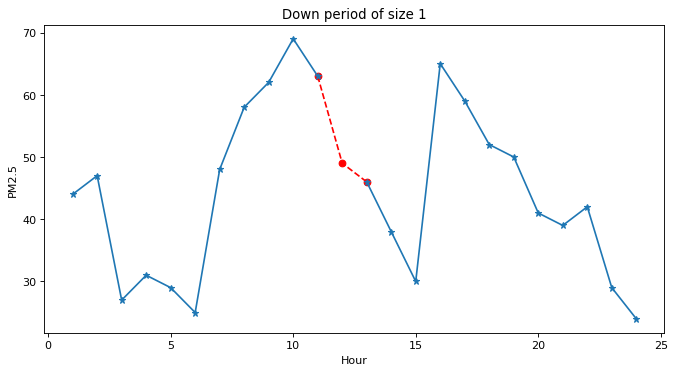

In [203]:
rows_of_day = df.apply(lambda row : row['month'] == 3 and row['day_month'] == 6 and row['Station']=='7MA', axis=1)
single_day_df = df[rows_of_day]
figure(figsize=(10, 5), dpi=80)
draw_example(single_day_df, [12], False, 'Down period of size 1')

Ahora, a veces los períodos de inactividad son más largos que un solo paso de tiempo. En tales casos, completar los valores que faltan puede ser más difícil que en el caso anterior.

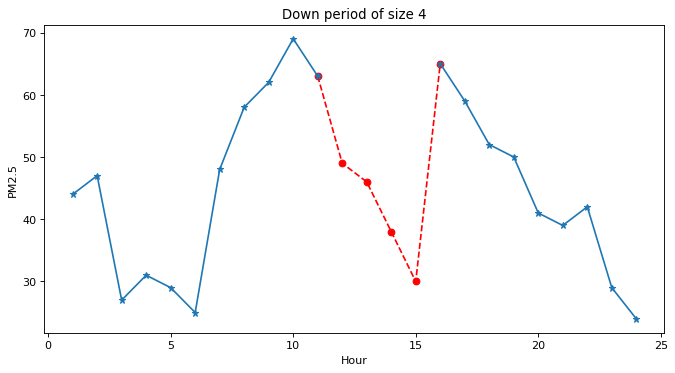

In [204]:
figure(figsize=(10, 5), dpi=80)
draw_example(single_day_df, [12, 13, 14, 15], False, 'Down period of size 4')

#### Ejemplo de un buen ajuste (fit)

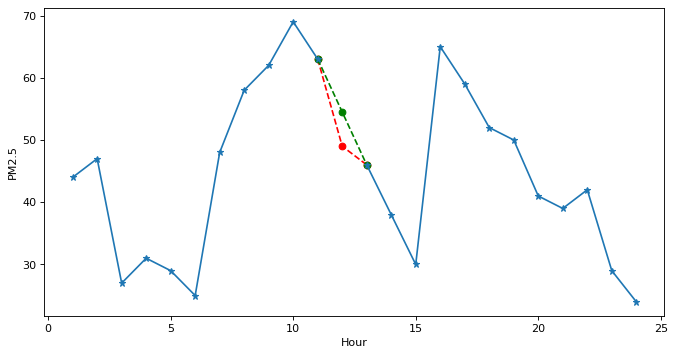

In [205]:
figure(figsize=(10, 5), dpi=80)
draw_example(single_day_df, [12])

#### Ejemplo de un mal ajuste (fit)

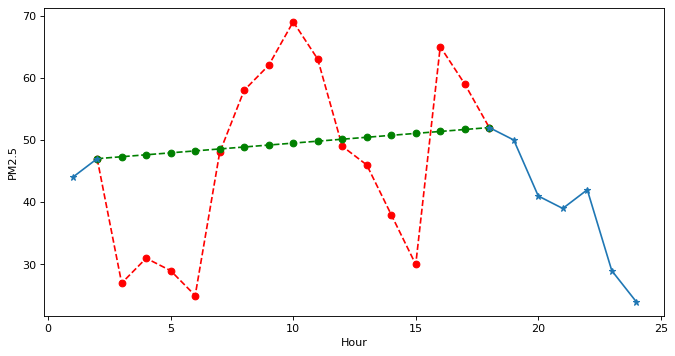

In [206]:
figure(figsize=(10, 5), dpi=80)
draw_example(single_day_df, list(range(3, 18)))

In [207]:
# This cell will delete all the rows which have Null values
target = 'PM2.5'
df_with_missing = df.copy()   # Save a copy with missing values
df.dropna(subset=[target], inplace=True)
df.isnull().sum()

PM10         0
PM2.5        0
NO           0
NO2          0
NOX          0
CO           0
OZONO        0
Station      0
DateTime     0
Status       0
Latitud      0
Longitud     0
month        0
day_week     0
day_month    0
hour         0
dtype: int64

## 4.2 Aplicación del modelo lineal


### Dividir en Entrenamiento/Prueba

Para entrenar un modelo de regresión lineal, debe dividir sus datos en conjuntos de entrenamiento y prueba. El conjunto de entrenamiento es con lo que creará una línea de mejor ajuste (Best Fit). Luego probará qué tan bien está su modelo comparando las predicciones de su modelo de regresión lineal con los datos reales.

<img src="img/split_data.png" alt="datos_divididos" width="400"/>

<center><b>Figura 1:</b> División de datos en conjuntos de entrenamiento y prueba </center>

Mezclará el conjunto de datos completo y dividirá sus datos de Bogotá en conjuntos de entrenamiento y prueba para la regresión lineal. Esto simulará el caso cuando tenga valores faltantes en sus datos en momentos aleatorios.

Divida el conjunto de datos ejecutando la siguiente celda de código:


In [208]:
# Split into train and test
train_df, test_df = train_test_split(df, test_size=0.20, random_state=42)

### Métricas de evaluación

**Las métricas de evaluación lo ayudan a comprender qué están haciendo bien sus modelos y qué les falta.** En general, usará un conjunto de datos para entrenar el modelo (`train_df`), y usará otro conjunto de datos para evaluar el rendimiento del modelo (`test_df`).

Puede utilizar el error cuadrático medio (MSE) para evaluar el rendimiento de un modelo cuando la salida es una variable continua, como la concentración de PM2.5.

<img src="img/MSE.png" alt="MSE" width="250"/>

<center><b>Figura 3:</b> Error cuadrático medio </center>

MSE mide la distancia (Figura 3) entre el valor real (puntos grises) y el valor predicho (línea azul), luego penaliza los errores grandes al elevar al cuadrado la distancia. Nuevamente, no se preocupe por los detalles de MSE, solo sepa que es una métrica común para evaluar el rendimiento.

MSE no es la única forma de medir el rendimiento de un modelo. Puedes usar otros como:

- **Error absoluto medio:** Muy similar a MSE, pero las distancias no están elevadas al cuadrado.
- **Coeficiente de determinación**, denotado por R2, es la proporción de la variación en la variable dependiente que es predecible a partir de la variable independiente.


<details>
  <summary><span style="color:blue">¿Está interesado en las fórmulas? Haga clic aquí</span></summary>
$$MSE = \frac{1}{N} \sum_{i=1}^{N}{(y_i - pred_i)^2}$$

$$MAE = \frac{1}{N} \sum_{i=1}^{N}{|y_i - pred_i|}$$
    
Donde N es el número de muestras en el conjunto de prueba  (`test_df`)
    
</details>

### Estableciendo una línea base

Una buena estrategia para entrenar modelos de IA consiste en crear modelos simples que refinas iterativamente hasta obtener un modelo final. Establecer una línea de base sólida es clave en el resto del proceso porque ayuda a determinar si su modelo realmente está aportando algo interesante o simplemente es una pérdida de tiempo y recursos. En nuestro caso, estamos interesados en métodos que nos ayuden a completar los valores que faltan.
Entonces, antes de crear su primer modelo que use el aprendizaje automático, utilizará 2 métodos simples para completar los valores faltantes. En el primer método, reemplazará cada valor faltante por la media o la mediana de la variable objetivo; el segundo método utilizará la mediana de cada estación para ese propósito. La implementación es muy sencilla y ya está implementada en Sklearn como uno de los métodos para la imputación de valores faltantes.

Tratemos de establecer nuestra línea de base.

In [209]:
regression_scores = {}

regression_scores['global_mean'] = missing_values_imputation_mean(train_df, test_df, 'PM2.5')
regression_scores['local_mean'] =  missing_values_imputation_mean_by_station(train_df, test_df,'PM2.5')    

print('Desempeño usando la media global')
print(regression_scores['global_mean'])
print('\nDesempeño usando la media por estation')
print(regression_scores['local_mean'])


Desempeño usando la media global
{'mse': 156.97398385813017, 'mae': 9.550823844818149}

Desempeño usando la media por estation
{'mse': 127.28405346106373, 'mae': 8.55618921096844}


/tmp/ipykernel_9014/496347290.py:47: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  map_station_mean[row.name] = row[0]


### Regresión lineal

**El ajuste de curvas** es una excelente forma de modelar datos de series temporales e implica ajustar una función a los datos y usarla para predecir los siguientes valores. Esencialmente, el punto es tratar de encontrar la función matemática que sigue mejor a los puntos de datos.

**La regresión lineal** es un tipo de ajuste de curva que intenta modelar la relación entre dos variables o características ajustando una ecuación lineal a los datos. ¡Esencialmente, está tratando de ajustar una línea recta a los datos que tiene!

<img src="img/linear.png" alt="regresión lineal" width="300"/>

<center><b>Figura 2:</b> Regresión lineal </center>

Encontrar la *línea de mejor ajuste* implica usar la ecuación `y = ax + b` que encuentra la relación entre las siguientes variables:
- `y`: el eje vertical. Representa PM2.5.
- `x`: el eje horizontal. Representa características (por ejemplo, mes, día/semana, hora, etc.).
- `a`: la pendiente, que determina el ángulo de la línea. Una pendiente más alta significa que el valor de PM2.5 está aumentando a un *ritmo* más rápido.
- `b`: determina qué tan alto o bajo llega la línea al eje y.

In [210]:
# You will call this function multiple times in this notebook. Think of this function as a tool which will take the data,
# fit into the Linear Regression Model and Evaluate
from sklearn.preprocessing import StandardScaler

def regression_model(feature_names, target, model):
    '''
    This function will take the features(x), the target(y) and the model name (Linear Regression)
    and will fit the data into the model (train your data using Linear Regression) 
    and Evaluate by returning the mean squared error and the mean absolute error 
    '''
    scaler = StandardScaler()

    #print(f"Features: {feature_names}\nTarget: {target}")
    
    X_train = train_df[feature_names]
    scaler.fit(X_train)
    
    X_train = scaler.transform(X_train)
    y_train = train_df[target]
    
    X_test = test_df[feature_names]
    X_test = scaler.transform(X_test)
    
    y_test = test_df[target]

    # Print out the shapes
    #print(f"\nX Train Shape:{X_train.shape}\ny Train Shape: {y_train.shape}\nX Test Shape: {X_test.shape}\ny Test Shape: {y_test.shape}")
    
    # Build and train model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\nModel Score: {model.score(X_test, y_test)}")
    
    return {"MSE": mean_squared_error(y_pred, y_test), "MAE": mean_absolute_error(y_pred, y_test)}

###  Multilayer Perceptron (MLP)

In [211]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(64, 32), learning_rate_init=0.07, verbose=True)
regression_scores_MLP = {}
target = 'PM2.5'
#feature_names = ['hour', 'day_week']
    
feature_names = ['hour', 'day_week'] +  ['Latitud', 'Longitud'] + ['PM10','CO','NO2','NOX','NO','OZONO']
    
regression_scores_MLP['model_with_day_hour'] = regression_model(feature_names, target, model)

print(regression_scores_MLP['model_with_day_hour'])

Iteration 1, loss = 27.55454208
Iteration 2, loss = 24.78887347
Iteration 3, loss = 24.44023554
Iteration 4, loss = 24.01625950
Iteration 5, loss = 23.95293010
Iteration 6, loss = 23.75516357
Iteration 7, loss = 23.67166928
Iteration 8, loss = 23.58642527
Iteration 9, loss = 23.56046074
Iteration 10, loss = 23.59134331
Iteration 11, loss = 23.55553091
Iteration 12, loss = 23.60595449
Iteration 13, loss = 23.58576057
Iteration 14, loss = 23.54876640
Iteration 15, loss = 23.40051132
Iteration 16, loss = 23.40528559
Iteration 17, loss = 23.32267598
Iteration 18, loss = 23.36460662
Iteration 19, loss = 23.16232747
Iteration 20, loss = 23.35868218
Iteration 21, loss = 23.31431646
Iteration 22, loss = 23.18085014
Iteration 23, loss = 23.21548029
Iteration 24, loss = 23.19179831
Iteration 25, loss = 22.99867737
Iteration 26, loss = 23.18014729
Iteration 27, loss = 23.19211684
Iteration 28, loss = 22.92326056
Iteration 29, loss = 23.15961902
Iteration 30, loss = 23.50297526
Iteration 31, loss 

In [213]:
from matplotlib.pyplot import figure

def draw_example2(sample, predicted2, missing_index):
    missing = missing_index
    missing_before_after = [missing[0]-1]+missing+[missing[-1]+1]

    example1 = sample.copy()
    example1.loc[example1['hour'].isin(missing),'PM2.5'] = float('NaN')
    plt.plot(missing_before_after,  sample[sample['hour'].isin(missing_before_after)]['PM2.5'] , 'r--o')

    example1['newPM2.5'] = example1['PM2.5'].interpolate(method='linear')

    plt.plot(missing_before_after, example1[example1['hour'].isin(missing_before_after)]['newPM2.5'], 'g--o')
    plt.plot(example1['hour'], example1['PM2.5'], '-*')
    
    example1['nnPM2.5'] = sample['PM2.5'].copy()
    example1.loc[example1['hour'].isin(missing), 'nnPM2.5'] = predicted2[np.array(missing)-1]
    plt.plot(missing_before_after, example1.loc[example1['hour'].isin(missing_before_after)]['nnPM2.5'], 'y--*')
    
    plt.xlabel('hour')
    plt.ylabel('PM2.5')
    plt.title('Single day real data and predictions')
    

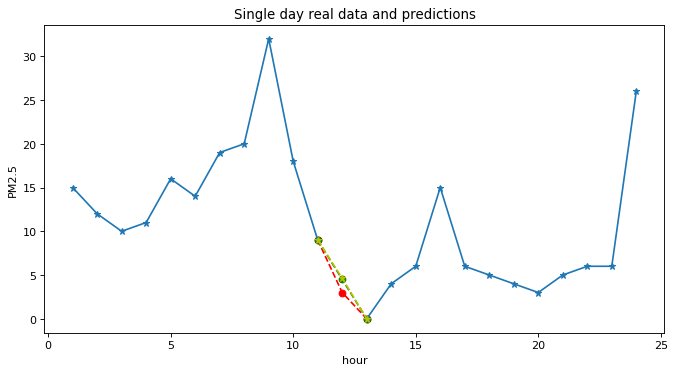

In [214]:
#rows_of_day = df.apply(lambda row : row['month'] == 11 and row['day_month'] == 3 and row['Station']=='USQ', axis=1)
rows_of_day = df.apply(lambda row : row['month'] == 11 and row['day_month'] == 6 and row['Station']=='USQ', axis=1)

single_day_df = df[rows_of_day]

scaler = StandardScaler()
X_train = train_df[feature_names]
scaler.fit(X_train)

X_test = single_day_df[feature_names]
X_test = scaler.transform(X_test)
y_test = single_day_df[target]

y_predicted = model.predict(X_test)
#y_predicted_DT = model.predict(X_test)

figure(figsize=(10, 5), dpi=80)
draw_example2(single_day_df, y_predicted, [12])

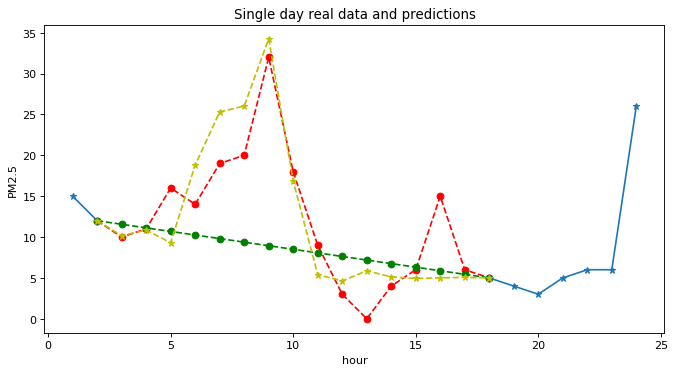

In [215]:
figure(figsize=(10, 5), dpi=80)
draw_example2(single_day_df,y_predicted, list(range(3, 18)))

### Probando con Árbol de Decisión 

In [216]:
from sklearn import tree

model = tree.DecisionTreeRegressor()
regression_scores_DT = {}
target = 'PM2.5'
#feature_names = ['hour', 'day_week']
    
feature_names = ['hour', 'day_week'] +  ['Latitud', 'Longitud'] + ['PM10','CO','NO2','NOX','NO','OZONO']
    
regression_scores_DT['model_with_day_hour'] = regression_model(feature_names, target, model)

print(regression_scores_DT['model_with_day_hour'])


Model Score: 0.47820901966350415
{'MSE': 81.90712796929796, 'MAE': 6.302822073711375}


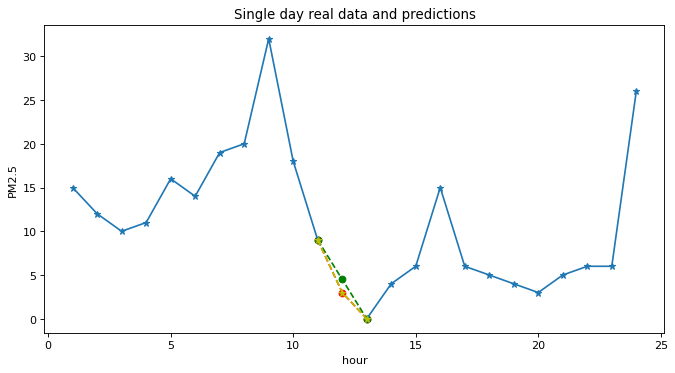

In [217]:
#rows_of_day = df.apply(lambda row : row['month'] == 11 and row['day_month'] == 3 and row['Station']=='USQ', axis=1)
rows_of_day = df.apply(lambda row : row['month'] == 11 and row['day_month'] == 6 and row['Station']=='USQ', axis=1)

single_day_df = df[rows_of_day]

scaler = StandardScaler()
X_train = train_df[feature_names]
scaler.fit(X_train)

X_test = single_day_df[feature_names]
X_test = scaler.transform(X_test)
y_test = single_day_df[target]

y_predicted = model.predict(X_test)
#y_predicted_DT = model1.predict(X_test)

figure(figsize=(10, 5), dpi=80)
draw_example2(single_day_df, y_predicted, [12])

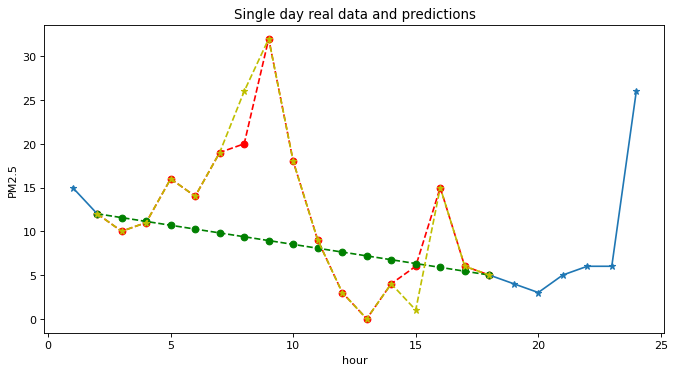

In [218]:
figure(figsize=(10, 5), dpi=80)
draw_example2(single_day_df,y_predicted, list(range(3, 18)))

## 4.3 Ajuste de parámetros, Búsqueda por cuadrícula, Validación cruzada

Los hiperparámetros son parámetros ajustables que permiten controlar el proceso de entrenamiento de un modelo. Por ejemplo, con redes neuronales, puede decidir el número de capas ocultas y el número de nodos de cada capa. ...El rendimiento de un modelo depende en gran medida de los hiperparámetros.

Es posible y recomendable buscar en el espacio de hiperparámetros para obtener la mejor validación cruzada, es decir, evaluar la puntuación de rendimiento del modelo.

Cualquier parámetro proporcionado al construir un modelo puede optimizarse de esta manera. Específicamente, para encontrar los nombres y los valores actuales de todos los parámetros para un modelo dado, podemos usar el siguiente método

estimator.get_params ()

Una búsqueda consta de:

* un modelo (regresor o clasificador como sklearn.svm.SVC ());
* un espacio de parámetros;
* un método para buscar o muestrear candidatos;
* un esquema de validación cruzada;
* una función de puntuación - metrica.

Algunos modelos permiten estrategias de búsqueda de parámetros especializadas y eficientes, que se describen a continuación.

En scikit-learn se proporcionan dos enfoques genéricos para muestrear candidatos de búsqueda:


<img src="https://developer.qualcomm.com/sites/default/files/attachments/learning_resources_03-05.png" width="500" height="270" >


**GridSearchCV:** La búsqueda de cuadrícula proporcionada por GridSearchCV genera exhaustivamente candidatos a partir de una cuadrícula de valores de parámetros especificados con el parámetro param_grid. Por ejemplo, el siguiente param_grid especifica que tiene una cuadrícula para explorar que es un núcleo lineal con valores alfa en [0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0009] y 'max_iter', es decir, un máximo de 10000 iteraciones.

param_grid = {'alpha':[0.01,0.001,0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0009],'max_iter':[10000]}

**RandomizedSearchCV:** puede muestrear un número determinado de candidatos de un espacio de parámetros con una distribución específica. Después de describir estas herramientas, detallamos las mejores prácticas aplicables a ambos enfoques.

Tenga en cuenta que es común que un pequeño subconjunto de esos parámetros pueda tener un gran impacto en el rendimiento predictivo o de cálculo del modelo, mientras que otros pueden dejarse con sus valores predeterminados. Se recomienda leer la cadena de documentación de la clase de estimador para comprender mejor su comportamiento esperado.


### 6.1 Búsqueda aleatoria/Random Search

En la búsqueda aleatoria, creamos una cuadrícula de hiperparámetros y entrenamos / probamos nuestro modelo en una combinación aleatoria de estos hiperparámetros. En este ejemplo, también decidí realizar una validación cruzada en el conjunto de entrenamiento.

Al realizar tareas de aprendizaje automático, generalmente dividimos nuestro conjunto de datos en conjuntos de entrenamiento y de prueba. Esto se hace para probar nuestro modelo después de haberlo entrenado (de esta manera podemos verificar su rendimiento cuando trabajamos con datos invisibles). Cuando usamos la validación cruzada, dividimos nuestro conjunto de entrenamiento en otras N particiones para asegurarnos de que nuestro modelo no sobreajuste nuestros datos.

Uno de los métodos de validación cruzada más utilizados es la **validación de K-Fold**. En K-Fold, dividimos nuestro conjunto de entrenamiento en N particiones y luego entrenamos iterativamente nuestro modelo usando N-1 particiones y lo probamos con la partición sobrante (en cada iteración cambiamos la partición sobrante). Una vez que hemos entrenado N veces el modelo, promediamos los resultados de entrenamiento obtenidos en cada iteración para obtener nuestros resultados de rendimiento de entrenamiento general.



<img src="https://upload.wikimedia.org/wikipedia/commons/f/f2/K-fold_cross_validation.jpg" width="500" height="270" >

El uso de la validación cruzada al implementar la optimización de hiperparámetros puede ser realmente importante. De esta manera, podríamos evitar el uso de algunos hiperparámetros que funcionan muy bien con los datos de entrenamiento pero no tan bien con los datos de prueba.
Ahora podemos comenzar a implementar la búsqueda aleatoria desafiando primero una cuadrícula de hiperparámetros que se muestrearán aleatoriamente al llamar a RandomizedSearchCV ().

In [219]:
#Librerias 
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV

In [220]:


scaler = StandardScaler()

    #print(f"Features: {feature_names}\nTarget: {target}")
    
X_train = train_df[feature_names]
scaler.fit(X_train)
    
X_train = scaler.transform(X_train)
y_train = train_df[target]
    
X_test = test_df[feature_names]
X_test = scaler.transform(X_test)
    
y_test = test_df[target]

random_search = {
               'max_depth': [2,3,4,20],
               'max_features': ['log2', 'sqrt'],
               'min_samples_leaf': [2,4, 6, 8],
               'min_samples_split': [2, 5, 7,10,20]}
kf = KFold(n_splits=2)
model = tree.DecisionTreeRegressor()
regression_scores_DT_Aleatoria = {}
target = 'PM2.5'
model_dt = RandomizedSearchCV(estimator = model,  param_distributions = random_search, n_iter = 20, 
                               cv = 10, verbose=True, random_state= 102, n_jobs = 3)
model_dt.fit(X_train, y_train)

feature_names = ['hour', 'day_week'] +  ['Latitud', 'Longitud'] + ['PM10','CO','NO2','NOX','NO','OZONO']
    
regression_scores_DT_Aleatoria['model_with_day_hour'] = regression_model(feature_names, target, model)

print(regression_scores_DT_Aleatoria)

Fitting 10 folds for each of 20 candidates, totalling 200 fits

Model Score: 0.4771533440636737
{'model_with_day_hour': {'MSE': 82.07284060080725, 'MAE': 6.308237940845629}}


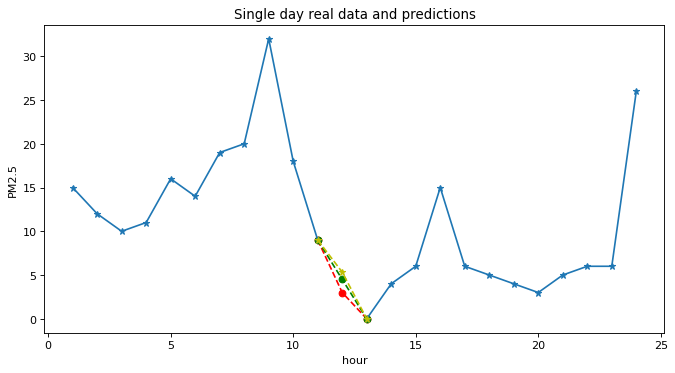

In [221]:
#rows_of_day = df.apply(lambda row : row['month'] == 11 and row['day_month'] == 3 and row['Station']=='USQ', axis=1)
rows_of_day = df.apply(lambda row : row['month'] == 11 and row['day_month'] == 6 and row['Station']=='USQ', axis=1)

single_day_df = df[rows_of_day]

scaler = StandardScaler()
X_train = train_df[feature_names]
scaler.fit(X_train)

X_test = single_day_df[feature_names]
X_test = scaler.transform(X_test)
y_test = single_day_df[target]

y_predicted = model_dt.predict(X_test)
#y_predicted_DT = model1.predict(X_test)

figure(figsize=(10, 5), dpi=80)
draw_example2(single_day_df, y_predicted, [12])

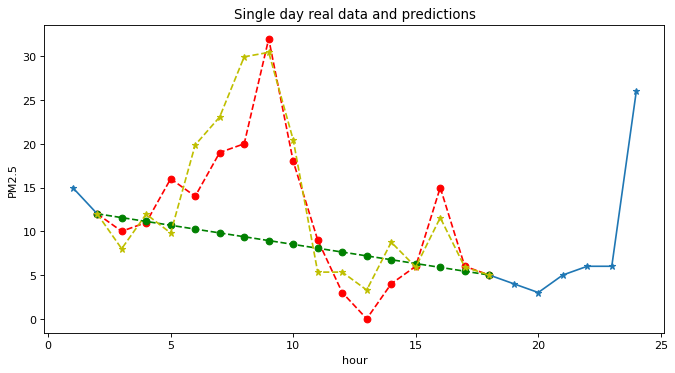

In [222]:
figure(figsize=(10, 5), dpi=80)
draw_example2(single_day_df,y_predicted, list(range(3, 18)))

### 6.1 Búsqueda cuadrícula/Grid Search

En Grid Search, configuramos una cuadrícula de hiperparámetros y entrenamos / probamos nuestro modelo en cada una de las combinaciones posibles.
Para elegir los parámetros que se utilizarán en la búsqueda de cuadrícula, ahora podemos ver qué parámetros funcionaron mejor con la búsqueda aleatoria y formar una cuadrícula basada en ellos para ver si podemos encontrar una mejor combinación.

- Grid Search se puede implementar en Python usando la función GridSearchCV().

In [223]:
#Librerias

from sklearn.model_selection import GridSearchCV


In [224]:
grid_search = {
               'max_depth': [None, 3, 5, 10],
               'max_features': [3, 5, 7, 'sqrt'],
               'min_samples_leaf': [2, 4, 6, 8],
               'min_samples_split': [2, 5, 7, 10],
           
               'min_samples_split': [2, 5, 10]
               }

model = tree.DecisionTreeRegressor()
regression_scores_DT_Cuadricula = {}
target = 'PM2.5'
model_gs = GridSearchCV(estimator = model, param_grid = grid_search, 
                               cv = 5, verbose= 5, n_jobs = -1)
model_gs.fit(X_train,y_train)

feature_names = ['hour', 'day_week'] +  ['Latitud', 'Longitud'] + ['PM10','CO','NO2','NOX','NO','OZONO']
    
regression_scores_DT_Cuadricula['model_with_day_hour'] = regression_model(feature_names, target, model)

print(regression_scores_DT_Cuadricula['model_with_day_hour'])

Fitting 5 folds for each of 192 candidates, totalling 960 fits
[CV 2/5] END max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=2;, score=0.527 total time=   0.4s
[CV 4/5] END max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=2;, score=0.533 total time=   0.3s
[CV 1/5] END max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=5;, score=0.551 total time=   0.3s
[CV 3/5] END max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=5;, score=0.531 total time=   0.4s
[CV 5/5] END max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=5;, score=0.521 total time=   0.3s
[CV 2/5] END max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=10;, score=0.588 total time=   0.2s
[CV 4/5] END max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=10;, score=0.579 total time=   0.3s
[CV 1/5] END max_depth=None, max_features=3, min_samples_leaf=4, min_samples_split=2;, score=0.608 total time

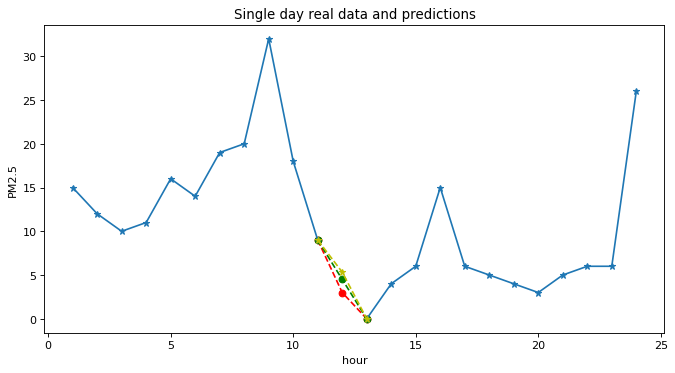

In [225]:
#rows_of_day = df.apply(lambda row : row['month'] == 11 and row['day_month'] == 3 and row['Station']=='USQ', axis=1)
rows_of_day = df.apply(lambda row : row['month'] == 11 and row['day_month'] == 6 and row['Station']=='USQ', axis=1)

single_day_df = df[rows_of_day]

scaler = StandardScaler()
X_train = train_df[feature_names]
scaler.fit(X_train)

X_test = single_day_df[feature_names]
X_test = scaler.transform(X_test)
y_test = single_day_df[target]

y_predicted = model_dt.predict(
    X_test)
#y_predicted_DT = model1.predict(X_test)

figure(figsize=(10, 5), dpi=80)
draw_example2(single_day_df, y_predicted, [12])

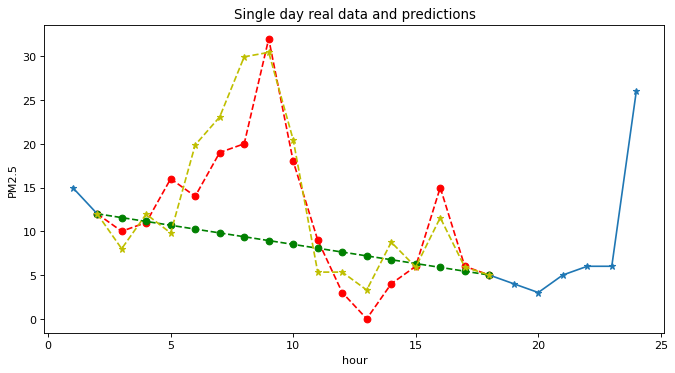

In [226]:
figure(figsize=(10, 5), dpi=80)
draw_example2(single_day_df,y_predicted, list(range(3, 18)))

## 4.4 Comparar modelos 

In [228]:
models_cross = pd.DataFrame({
    'Model': ['MLP','DT', 'DT Aleatorio', 'DT Cuadricula'],
    'MAE': [
            regression_scores_MLP['model_with_day_hour']['MAE'],
            regression_scores_DT['model_with_day_hour']['MAE'],
            regression_scores_DT_Aleatoria['model_with_day_hour']['MAE'],
            regression_scores_DT_Cuadricula['model_with_day_hour']['MAE']
            
           ],
    'MSE': [
            regression_scores_MLP['model_with_day_hour']['MSE'],
            regression_scores_DT['model_with_day_hour']['MSE'],
            regression_scores_DT_Aleatoria['model_with_day_hour']['MSE'],
            regression_scores_DT_Cuadricula['model_with_day_hour']['MSE']           
           ] 
    })
 
    
    
models_cross.sort_values(by='MAE', ascending=True)

,Model,MAE,MSE
0,MLP,5.065190,48.141225
1,DT,6.302822,81.907128
2,DT Aleatorio,6.308238,82.072841
3,DT Cuadricula,6.347954,83.825830


# Implemente su modelo 

 - Construya un modelo de regresión difrente a los anteriores y configure los parámetros para mejorar el rendimiento de la predicción.  
 - Saque al menos dos conclusiones de la implementación de su modelo versus los modelos de este notebook. 

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor

# Modelo KNN
model = KNeighborsRegressor(n_neighbors=5)

feature_names = ['hour', 'day_week'] +  ['Latitud', 'Longitud'] + ['PM10','CO','NO2','NOX','NO','OZONO']

target = 'PM2.5'

regression_scores_MLP['model_KNN'] = regression_model(feature_names, target, model)


Model Score: 0.7005914938646882


In [235]:
# comparar con otros modelos
models_cross = pd.DataFrame({
    'Model': ['MLP','DT', 'DT Aleatorio', 'DT Cuadricula', 'KNN'],
    'MAE': [
            regression_scores_MLP['model_with_day_hour']['MAE'],
            regression_scores_DT['model_with_day_hour']['MAE'],
            regression_scores_DT_Aleatoria['model_with_day_hour']['MAE'],
            regression_scores_DT_Cuadricula['model_with_day_hour']['MAE'],
            regression_scores_MLP['model_KNN']['MAE']
           ],
    'MSE': [
            regression_scores_MLP['model_with_day_hour']['MSE'],
            regression_scores_DT['model_with_day_hour']['MSE'],
            regression_scores_DT_Aleatoria['model_with_day_hour']['MSE'],
            regression_scores_DT_Cuadricula['model_with_day_hour']['MSE'],
            regression_scores_MLP['model_KNN']['MSE']
           ] 
    })

models_cross.sort_values(by='MAE', ascending=True)

,Model,MAE,MSE
4,KNN,4.777534,46.999070
0,MLP,5.065190,48.141225
1,DT,6.302822,81.907128
2,DT Aleatorio,6.308238,82.072841
3,DT Cuadricula,6.347954,83.825830


## Conclusiones

1. El modelo KNN funciona mejor incluso sin variar mucho los parametros dado que un problema como la calidad del aire, es probable que las mediciones cercanas (en el espacio o en el tiempo) sean similares, lo que beneficia a un modelo basado en proximidad como KNN.
2. En A diferencia de modelos como la regresión lineal, KNN no necesita una función matemática definida para las relaciones entre variables, lo que lo hace flexible para manejar datos de distribuciones complejas. 
3. Las caracteristicas de los datos determinan el modelo a usar, por ello se hace importante realizar un buen analisis previo

In [ ]:
# Codigo de entrenamiento de modelo
# scaler = StandardScaler()

# X_train = train_df[feature_names]
# scaler.fit(X_train)
    
# X_train = scaler.transform(X_train)
# y_train = train_df[target]
    
# X_test = test_df[feature_names]
# X_test = scaler.transform(X_test)
    
# y_test = test_df[target]

# # Build and train model
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# print(f"\nModel Score: {model.score(X_test, y_test)}")
    
# print("MSE : " + str(mean_squared_error(y_pred, y_test)))
# print("MAE : " + str(mean_absolute_error(y_pred, y_test)))

# model.fit(X_train, y_train)
# model_predictions = model.predict(X_test)

# Codigo para encontrar las mejores caracteristicas para un modelo de regresion
# Consume muchos recursos y tiempo
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV

# # Definir el modelo
# rf_model = RandomForestRegressor()

# # Definir la cuadrícula de hiperparámetros
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth': [10, 20, 30, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Configurar la búsqueda de cuadrícula
# grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
#                               cv=3, n_jobs=-1, verbose=2)

# # Entrenar el modelo
# grid_search_rf.fit(X_train, y_train)

# # Obtener los mejores parámetros
# best_params_rf = grid_search_rf.best_params_
# print("Mejores parámetros para Random Forest: ", best_params_rf)

# # Evaluar el modelo
# rf_best_model = grid_search_rf.best_estimator_
# y_pred_rf = rf_best_model.predict(X_test)

# # Calcular métricas de evaluación
# mse_rf = mean_squared_error(y_test, y_pred_rf)
# mae_rf = mean_absolute_error(y_test, y_pred_rf)

# print(f"Random Forest - MSE: {mse_rf}, MAE: {mae_rf}")